 ## 0. Подгрузка модулей

In [1]:
import time
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Polish dataset
[Ссылка на скачивание](http://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data)

Набор данных посвящен прогнозированию банкротства польских компаний. Содержит кучу вычисленных параметров из финансовых показателей компаний, ниже приведено описание каждого атрибута. Данные собирались с 2007 по 2013 г.г., организованы в 5-ти таблицах за каждый год.

Показатели из других работ:

| Paper | ACC | AUC | Gini |
| --- | --- | --- | --- | 
| Ala’raj & Abbod, 2016a | 0.7681 | 0.8406 | 0.6812 | 
| Maldonado et al., 2021 | - | 0.9348 | 0.8696 | 
| Zhang, 2021a | 0.98096 | 0.94884 | 0.8977 | 


 ## 1. Подгрузка данных

#### Читаем все таблицы, склеиваем в одну большую.

In [2]:
df_1 = pd.read_csv("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] data/1year.arff",
                  header = None, sep = ',')
df_2 = pd.read_csv("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] data/2year.arff",
                  header = None, sep = ',')
df_3 = pd.read_csv("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] data/3year.arff",
                  header = None, sep = ',')
df_4 = pd.read_csv("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] data/4year.arff",
                  header = None, sep = ',')
df_5 = pd.read_csv("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] data/5year.arff",
                  header = None, sep = ',')

df = (pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True, sort =False))

df.columns = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10',
              'X11','X12','X13','X14','X15','X16','X17','X18','X19','X20',
              'X21','X22','X23','X24','X25','X26','X27','X28','X29','X30',
              'X31','X32','X33','X34','X35','X36','X37','X38','X39','X40',
              'X41','X42','X43','X44','X45','X46','X47','X48','X49','X50',
              'X51','X52','X53','X54','X55','X56','X57','X58','X59','X60',
              'X61','X62','X63','X64', 'target']

df.head()

/Users/vaneque/Desktop/L'ecole /Model risks/credit_scoring_project/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,5,6,8,9,10,13,17,21,23,24,28,34,35,37,47,50,54,56,58) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/vaneque/Desktop/L'ecole /Model risks/credit_scoring_project/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (14,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/vaneque/Desktop/L'ecole /Model risks/credit_scoring_project/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,5,6,7,9,10,13,14,15,16,17,21,23,24,25,28,33,34,35,37,47,49,50,56,58) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_n

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,target
0,0.20055,0.37951,0.39641,2.0472,32.351,0.38825,0.24976,1.3305,1.1389,0.50494,...,0.12196,0.39718,0.87804,0.001924,8.416,5.1372,82.658,4.4158,7.4277,0
1,0.20912,0.49988,0.47225,1.9447,14.786,0,0.25834,0.99601,1.6996,0.49788,...,0.1213,0.42002,0.853,0,4.1486,3.2732,107.35,3.4,60.987,0
2,0.24866,0.69592,0.26713,1.5548,-1.1523,0,0.30906,0.43695,1.309,0.30408,...,0.24114,0.81774,0.76599,0.69484,4.9909,3.951,134.27,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.952,0.14988,0.092704,1.8661,1.0571,0.57353,...,0.054015,0.14207,0.94598,0,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.18732,0.61323,0.2296,1.4063,-7.3128,0.18732,0.18732,0.6307,1.1559,0.38677,...,0.13485,0.48431,0.86515,0.12444,6.3985,4.3158,127.21,2.8692,7.898,0


###   Предобработка пропущенных значений

In [3]:
df.isna().sum(axis=0)

X1        0
X2        0
X3        0
X4        0
X5        0
         ..
X61       0
X62       0
X63       0
X64       0
target    0
Length: 65, dtype: int64

Видим, что пропущенных значений 'Nan' в таблицы нет, однако они выражены символами '?', которые мешают дальнейшей работе, заменяем их на Nan.

In [4]:
for item in df.columns:
    df[item] = df[item].replace('?', np.nan)
    df[item] = pd.to_numeric(df[item])

In [5]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,target
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


## 2. Анализ факторов
### Список факторов

| No. | Attribute | Type | Description | Values (if qualitative)
| -:- | --- | --- | --- | ---
| 0 | X1 | numerical | net profit / total assets  | - |   
| 1 | X2 | numerical | total liabilities / total assets  | - |  
| 2 | X3 | numerical | working capital / total assets | - |  
| 3 | X4 | numerical | current assets / short-term liabilities | - |  
| 4 | X5 | numerical | [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 | - |
| 5 | X6 | numerical | retained earnings / total assets | - |  
| 6 | X7 | numerical | EBIT / total assets | - | 
| 7 | X8 | numerical | book value of equity  total liabilities | - | 
| 8 | X9 | numerical | sales / total assets | - |  
| 9 | X10 | numerical | equity / total assets | - |  
| 10 | X11 | numerical | (gross profit + extraordinary items + financial expenses) / total assets | - |  
| 11 | X12 | numerical | gross profit / short-term liabilities | - |  
| 12 | X13 | numerical | (gross profit + depreciation) / sales | - |  
| 13 | X14 | numerical | (gross profit + interest) / total assets | - |  
| 14 | X15 | numerical | (total liabilities * 365) / (gross profit + depreciation) | - |  
| 15 | X16 | numerical | (gross profit + depreciation) / total liabilities | - |  
| 16 | X17 | numerical | total assets / total liabilities  | - |  
| 17 | X18 | numerical | gross profit / total assets  | - |  
| 18 | X19 | numerical | gross profit / sales  | - |  
| 19 | X20 | numerical | (inventory * 365) / sales | - |  
| 20 | X21 | numerical | sales (n) / sales (n-1) | - |  
| 21 | X22 | numerical | profit on operating activities / total assets  | - |  
| 22 | X23 | numerical | net profit / sales  | - |  
| 23 | X24 | numerical | gross profit (in 3 years) / total assets  | - |  
| 24 | X25 | numerical | (equity - share capital) / total assets  | - |  
| 25 | X26 | numerical | (net profit + depreciation) / total liabilities | - |  
| 26 | X27 | numerical | profit on operating activities / financial expenses | - |  
| 27 | X28 | numerical | working capital / fixed assets | - |  
| 28 | X29 | numerical | logarithm of total assets | - |  
| 29 | X30 | numerical | (total liabilities - cash) / sales | - |  
| 30 | X31 | numerical | (gross profit + interest) / sales | - |  
| 31 | X32 | numerical | (current liabilities * 365) / cost of products sold | - |  
| 32 | X33 | numerical | operating expenses / short-term liabilities | - |  
| 33 | X34 | numerical | operating expenses / total liabilities | - |  
| 34 | X35 | numerical | profit on sales / total assets | - |  
| 35 | X36 | numerical | total sales / total assets | - |  
| 36 | X37 | numerical | (current assets - inventories) / long-term liabilities | - |  
| 37 | X38 | numerical | constant capital / total assets | - |  
| 38 | X39 | numerical | profit on sales / sales | - |  
| 39 | X40 | numerical | (current assets - inventory - receivables) / short-term liabilities | - |  
| 40 | X41 | numerical | total liabilities / ((profit on operating activities + depreciation) * (12/365)) | - |  
| 41 | X42 | numerical | profit on operating activities / sales | - |  
| 42 | X43 | numerical | rotation receivables + inventory turnover in days | - |  
| 43 | X44 | numerical | (receivables * 365) / sales | - |  
| 44 | X45 | numerical | net profit / inventory | - |  
| 45 | X46 | numerical | (current assets - inventory) / short-term liabilities | - |  
| 46 | X47 | numerical | (inventory * 365) / cost of products sold | - |  
| 47 | X48 | numerical | EBITDA (profit on operating activities - depreciation) / total assets | - |  
| 48 | X49 | numerical | EBITDA (profit on operating activities - depreciation) / sales | - |  
| 49 | X50 | numerical | current assets / total liabilities | - |  
| 50 | X51 | numerical | short-term liabilities / total assets | - |  
| 51 | X52 | numerical | (short-term liabilities * 365) / cost of products sold) | - |  
| 52 | X53 | numerical | equity / fixed assets | - |  
| 53 | X54 | numerical | constant capital / fixed assets | - |  
| 54 | X55 | numerical | working capital | - |  
| 55 | X56 | numerical | (sales - cost of products sold) / sales | - |  
| 56 | X57 | numerical | (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) | - |  
| 57 | X58 | numerical | total costs /total sales | - |  
| 58 | X59 | numerical | long-term liabilities / equity  | - |  
| 59 | X60 | numerical | sales / inventory | - |  
| 60 | X61 | numerical | sales / receivables | - |  
| 61 | X62 | numerical | (short-term liabilities *365) / sales  | - |  
| 62 | X63 | numerical | sales / short-term liabilities | - |  
| 63 | X64 | numerical | sales / fixed assets | - |  
| 64 | X65 | binary | target | 0 : non-default  
|  |  |  |  | 1 : default

Все факторы в таблице - вещественные, обработка категориальных параметров не потребуется. Сформируем разбивку на train/test.

### Разбиваем на train/test, записываем типы переменных и сохраняем.

In [10]:
X = df.loc[:, df.columns != 'target']
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

# Save data & info ===
# parquet is optimized for large volumes of data
!mkdir Users/vaneque/Desktop/L'ecole /Model risks/Data/
X_train.to_parquet("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] Polish/X_train.parquet")
X_test.to_parquet("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] Polish/X_test.parquet")
# переводим pd.Series в pd.DataFrame для удобного экспорта
pd.DataFrame(y_train).to_parquet("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] Polish/y_train.parquet")
pd.DataFrame(y_test).to_parquet("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] Polish/y_test.parquet")

# сохраняем списки категориальных и колич. переменных
cat_vals = []
num_vals = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10',
            'X11','X12','X13','X14','X15','X16','X17','X18','X19','X20',
            'X21','X22','X23','X24','X25','X26','X27','X28','X29','X30',
            'X31','X32','X33','X34','X35','X36','X37','X38','X39','X40',
            'X41','X42','X43','X44','X45','X46','X47','X48','X49','X50',
            'X51','X52','X53','X54','X55','X56','X57','X58','X59','X60',
            'X61','X62','X63','X64']

with open("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[10] Polish/factors.json", 'w') as f:
    json.dump({'cat_vals': cat_vals, 'num_vals': num_vals}, f)

zsh:1: unmatched '


## 3. Статистики и пропуски

### Статистики

In [7]:
print(f'Количество наблюдений: {X.shape[0]}')
print(f'Количество факторов: {X.shape[1]}')
print(f'Количество целевых событий: {y.sum()}')
print(f'Доля целевых событий: {np.round(y.sum() / X.shape[0] * 100, 2)}%')

Количество наблюдений: 43405
Количество факторов: 64
Количество целевых событий: 2091
Доля целевых событий: 4.82%


### Пропуски


In [8]:
for col in X.columns:
    print(f'Количество пропусков по фактору {col}:\n\t{X[col].isna().sum()} или {(X[col].isna().sum() / df.shape[0] * 100):.2f}%')

Количество пропусков по фактору X1:
	8 или 0.02%
Количество пропусков по фактору X2:
	8 или 0.02%
Количество пропусков по фактору X3:
	8 или 0.02%
Количество пропусков по фактору X4:
	134 или 0.31%
Количество пропусков по фактору X5:
	89 или 0.21%
Количество пропусков по фактору X6:
	8 или 0.02%
Количество пропусков по фактору X7:
	8 или 0.02%
Количество пропусков по фактору X8:
	94 или 0.22%
Количество пропусков по фактору X9:
	9 или 0.02%
Количество пропусков по фактору X10:
	8 или 0.02%
Количество пропусков по фактору X11:
	44 или 0.10%
Количество пропусков по фактору X12:
	134 или 0.31%
Количество пропусков по фактору X13:
	127 или 0.29%
Количество пропусков по фактору X14:
	8 или 0.02%
Количество пропусков по фактору X15:
	36 или 0.08%
Количество пропусков по фактору X16:
	95 или 0.22%
Количество пропусков по фактору X17:
	94 или 0.22%
Количество пропусков по фактору X18:
	8 или 0.02%
Количество пропусков по фактору X19:
	128 или 0.29%
Количество пропусков по фактору X20:
	127 или

## 4. Визуальный анализ и выбросы

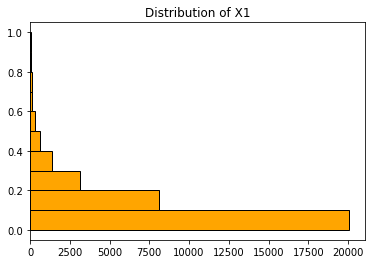

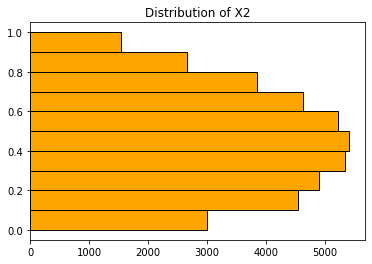

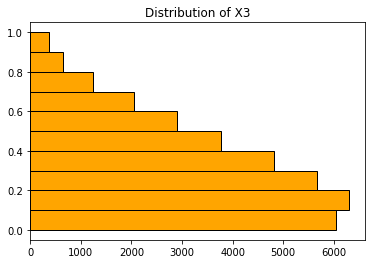

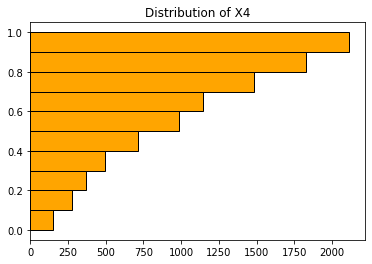

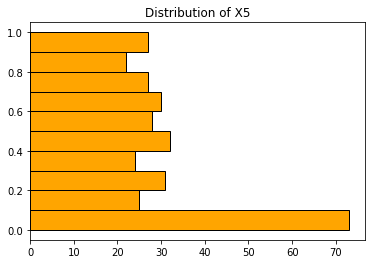

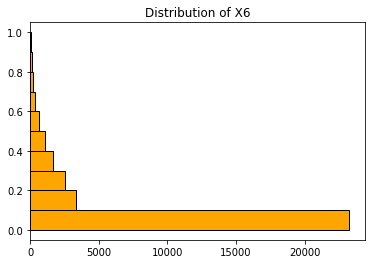

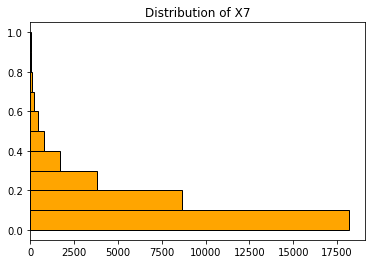

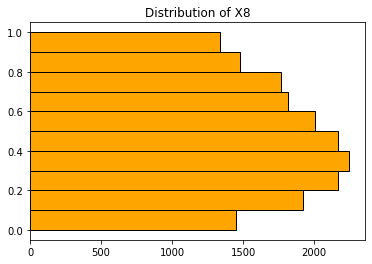

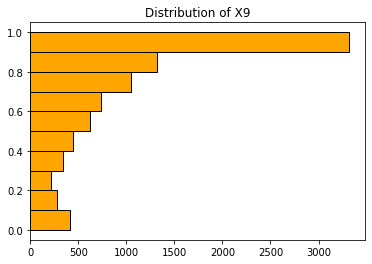

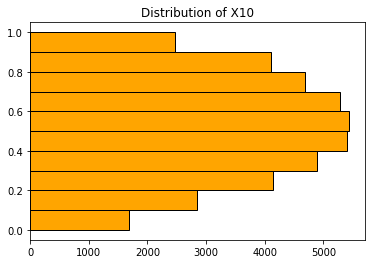

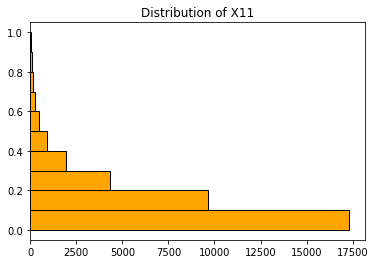

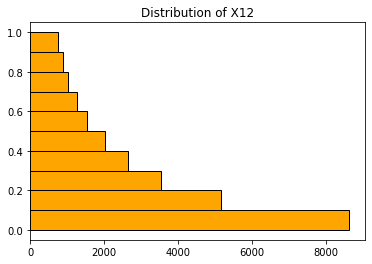

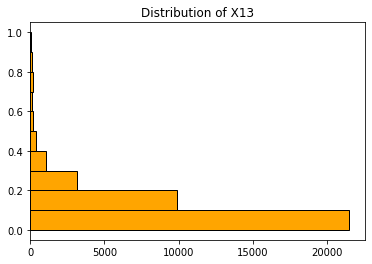

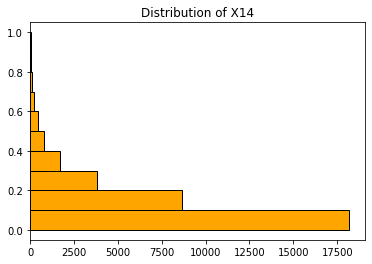

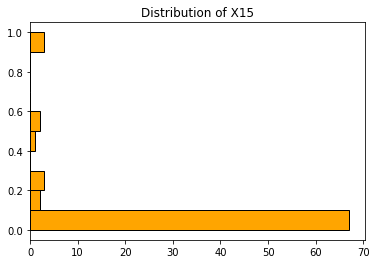

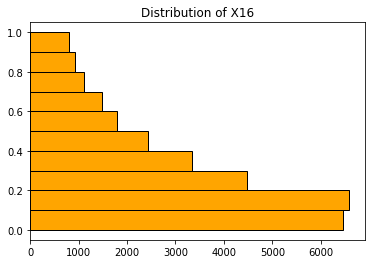

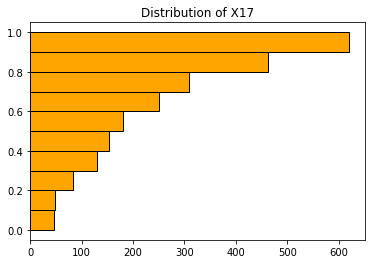

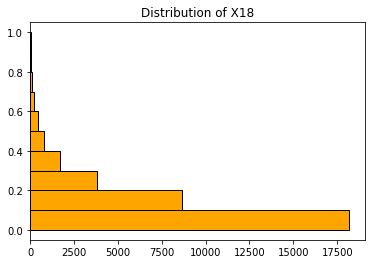

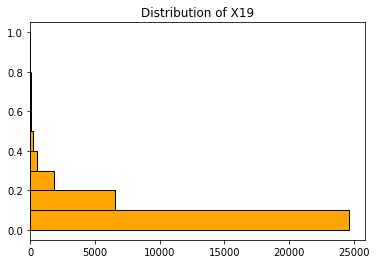

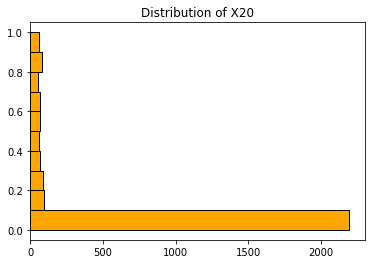

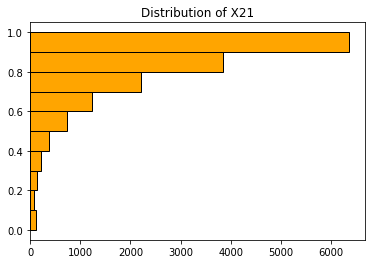

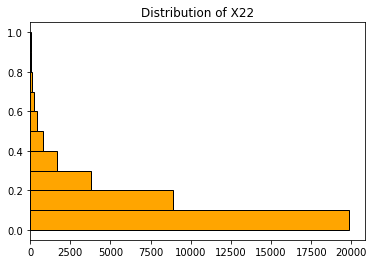

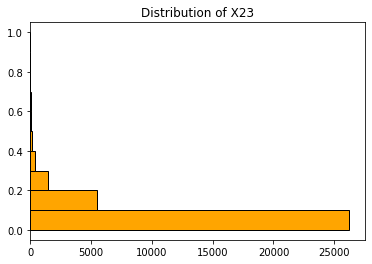

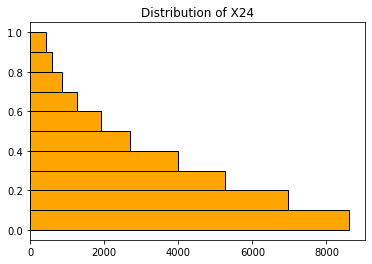

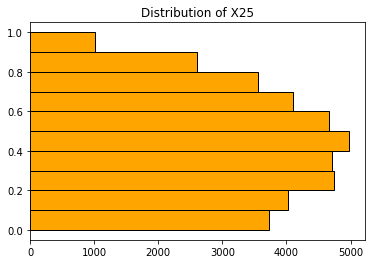

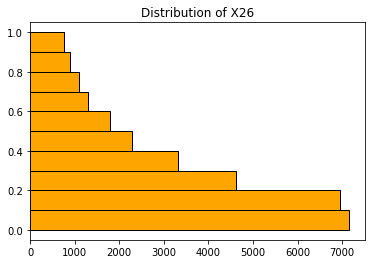

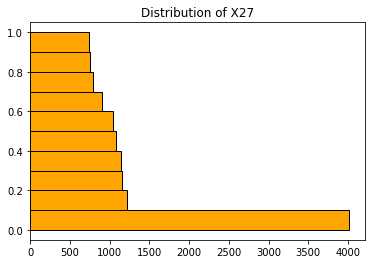

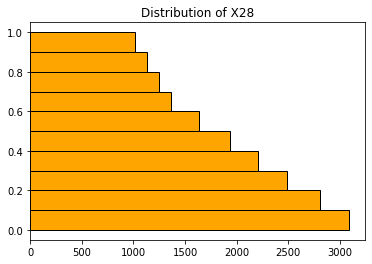

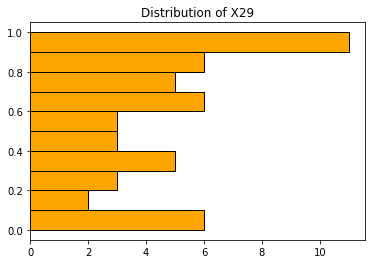

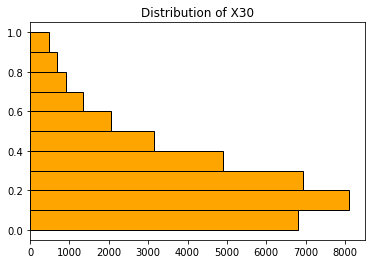

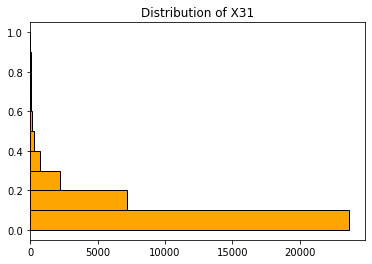

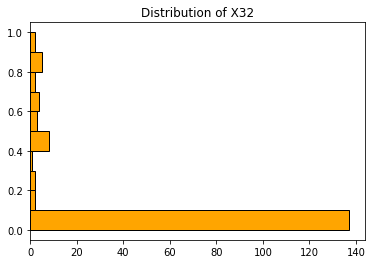

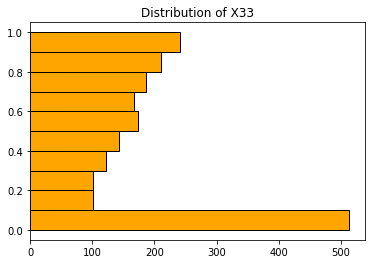

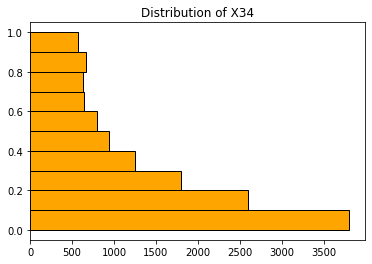

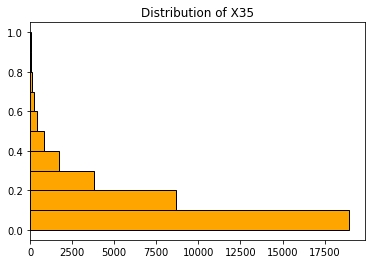

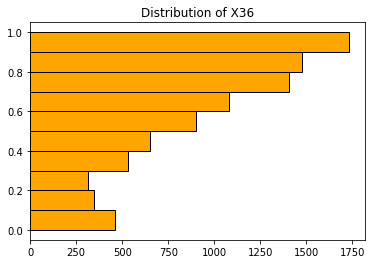

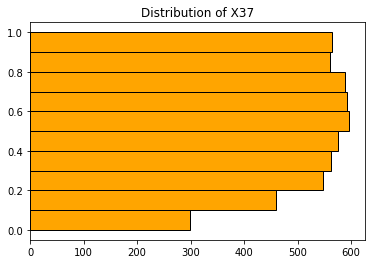

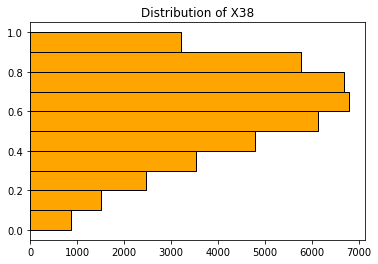

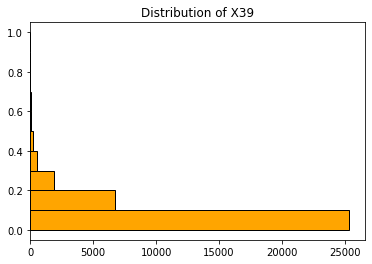

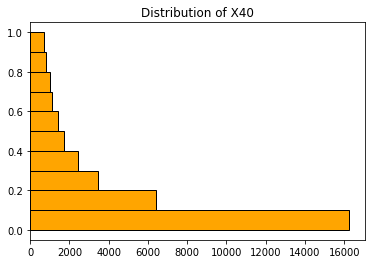

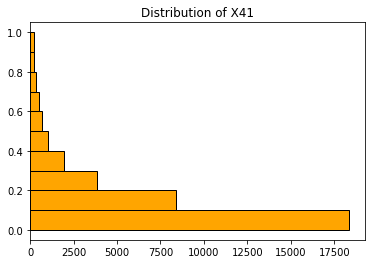

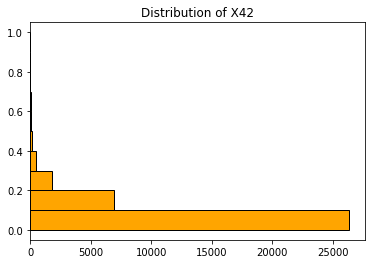

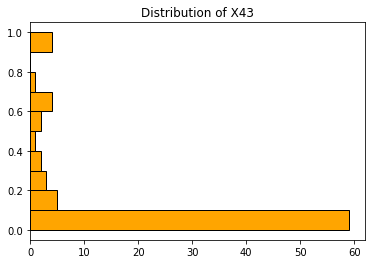

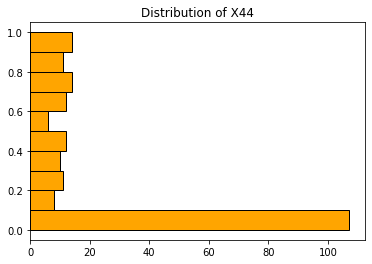

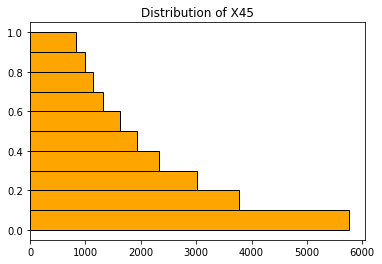

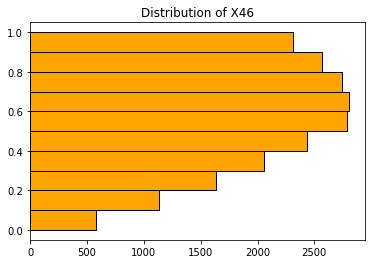

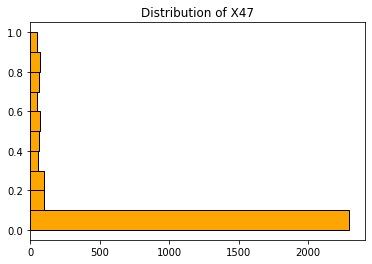

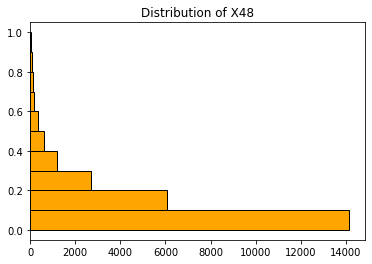

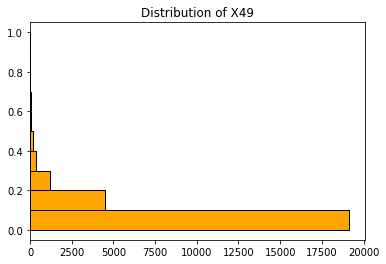

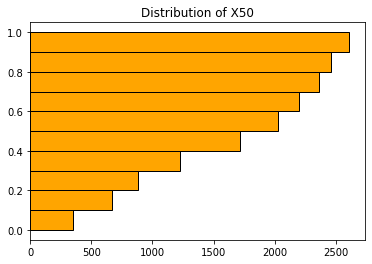

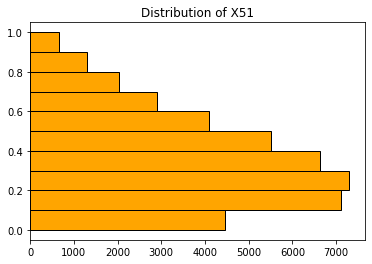

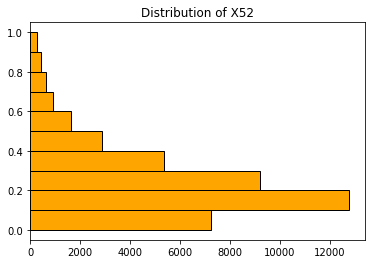

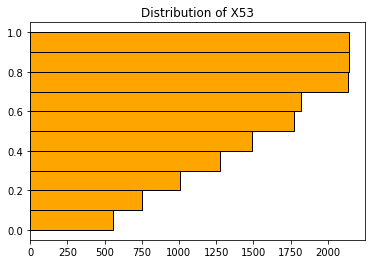

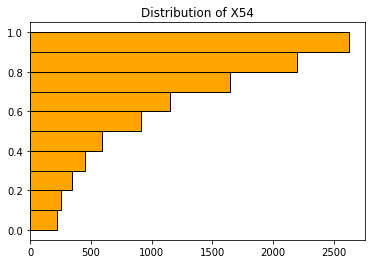

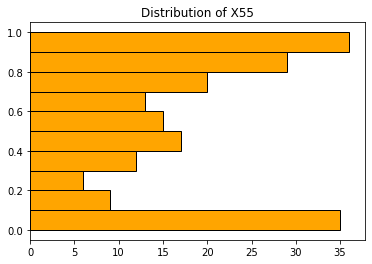

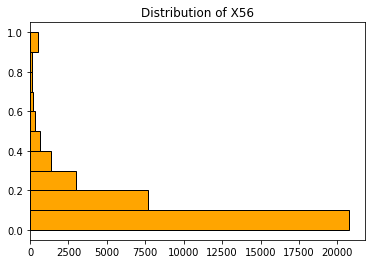

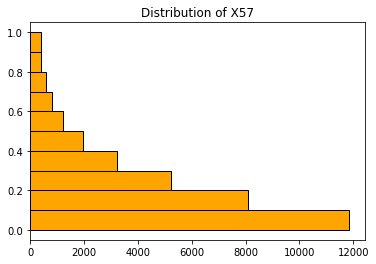

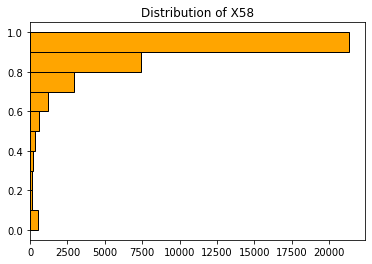

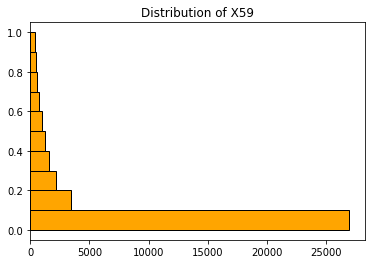

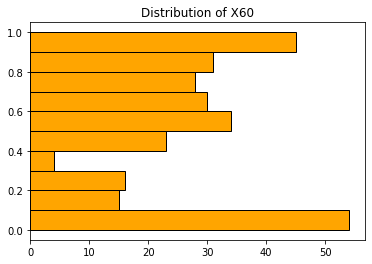

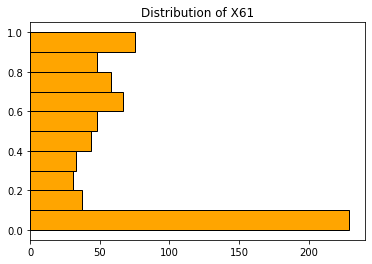

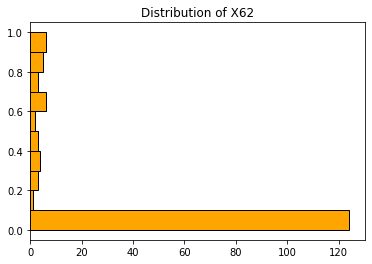

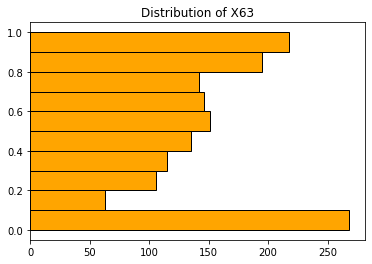

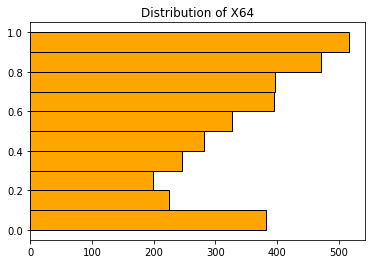

In [9]:
for col in X.columns:
    plt.hist(X[col], color='orange', ec='black' , orientation = 'horizontal', range = (0,1))
    plt.title(f'Distribution of {col}')
    plt.show()

Судя по графикам, фаторы X6, X15, X20, X27, X32, X33, X43, X44, X57, X59, X61, X62 - похожи на выбросы.


### Выводы

Приятный датасет с большим коичеством факторов и наблюдений. Все значения уже нормализованы. Очень мало целевых значений, пропусков мало - не более 2% в рамках одного наблюдения.